In [1]:
from glob import glob
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from HOTRG import get_lattice_size,get_dist_torus_2D,get_dist_2D
from scipy.optimize import curve_fit,minimize
from correlation_ansatzs import loglog,get_low_temp_correlation_known_m0,critical_correlation,high_temp_correlation


def process_data(data,log2Size=30):
    lattice_size=get_lattice_size(nLayers=2*log2Size,spacial_dim=2)
    data['x']=data.apply(lambda row:row['x1']-row['x0'],axis=1)
    data['y']=data.apply(lambda row:row['y1']-row['y0'],axis=1)
    data['dist']=data.apply(lambda row:get_dist_torus_2D(row['x'],row['y'],lattice_size),axis=1)
    data['theta']=data.apply(lambda row:np.arctan2(row['y'],row['x']),axis=1)
    data=data.sort_values(by=['dist'])
    return data

def fitWithHuberLoss(ansatz,x,y,w=None,p0=None,epsilon=1,
                     bounds=None,
                             allow_positive_outliers=True,allow_negative_outliers=True):
    def loss(xs,ys,*p):
        dist=ys-ansatz(xs,*p)
        loss1=1/2 * dist**2 # lsq
        loss2=epsilon*(np.abs(dist)-epsilon/2) # huber
        if allow_positive_outliers:
            loss1[dist>epsilon]=loss2[dist>epsilon]
        if allow_negative_outliers:
            loss1[dist<-epsilon]=loss2[dist<-epsilon]
        return np.sum(loss1*w)
    w=w or np.ones_like(x)
    xfit,yfit=x,y
    res=minimize(lambda p: loss(xfit,yfit,*p),p0,method='Nelder-Mead',tol=1e-6,bounds=bounds)
    p=res.x
    return p


def fit_data(x,y,ansatz,
             huber_epsilon=1e-1,
             x_min=None,x_max=None,
            y_min=None,y_max=None,
            bounds=None,
                use_loglog=True):
    x,y=np.array(x),np.array(y)
    # idx=np.argsort(x);x,y=x[idx],y[idx]
    if x_min is not None:x,y=x[x>x_min],y[x>x_min]
    if x_max is not None:x,y=x[x<x_max],y[x<x_max]
    if y_min is not None:x,y=x[y>y_min],y[y>y_min]
    if y_max is not None:x,y=x[y<y_max],y[y<y_max]
    
    if use_loglog:
        x,y=x[x>0],y[x>0];x,y=x[y>0],y[y>0]
        print("number of data points:",len(x))
        logx,logy=np.log(x),np.log(y)
        p=tuple(ansatz.p0)
        # p,_=curve_fit(loglog(ansatz),logx,logy,p0=p,maxfev=10000,bounds=bounds)
        # print('coarse fitted parameters:',p)
        import inspect
        print(inspect.getsource(ansatz))
        p=fitWithHuberLoss(loglog(ansatz),logx,logy,p0=p,epsilon=huber_epsilon,bounds=bounds)
    else:
        p=tuple(ansatz.p0)
        # p,_=curve_fit(ansatz,x,y,p0=ansatz.p0,maxfev=10000,bounds=bounds)
        p=fitWithHuberLoss(ansatz,x,y,p0=p,epsilon=huber_epsilon,bounds=bounds)
    print('fitted parameters:',p)
    print('fitted equation:',ansatz.eq.format(*p))
    return p,ansatz

[GILT] Warning! float32 is not precise enough, leads to bad RG behavior
[GILT] Warning! float32 is not precise enough, leads to bad RG behavior



# beta: 0.441584
m0: 0.5565094204358004
y_min: 1e-05
number of data points: 708
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)



/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: divide by zero encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [4.15764281e-01 1.11046881e+02 2.76683016e-01 6.11664310e-03]
fitted equation: 4.16e-01e^(-x/ζ)/x^(2 Δ),ζ=1.11e+02,Δ=0.2767


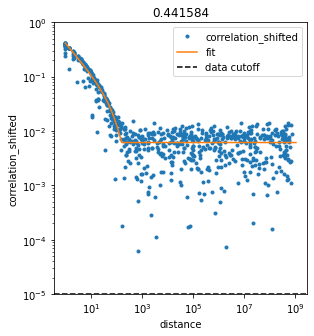


# beta: 0.441484
m0: 0.5475302694327275
y_min: 1e-05
number of data points: 707
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)



/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: divide by zero encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [4.23392065e-01 1.10302873e+02 2.66764798e-01 6.32386643e-03]
fitted equation: 4.23e-01e^(-x/ζ)/x^(2 Δ),ζ=1.10e+02,Δ=0.2668


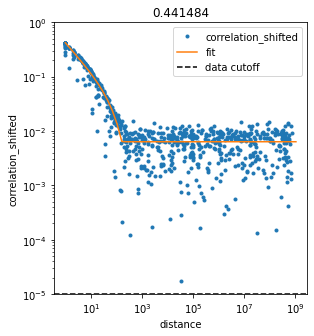


# beta: 0.441384
m0: 0.5370537872172468
y_min: 1e-05
number of data points: 705
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)



/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: divide by zero encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [4.32221331e-01 1.15013548e+02 2.56952011e-01 6.38358189e-03]
fitted equation: 4.32e-01e^(-x/ζ)/x^(2 Δ),ζ=1.15e+02,Δ=0.2570


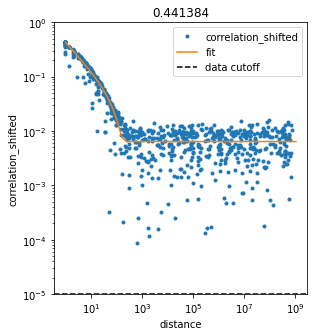


# beta: 0.441284
m0: 0.5274988558121622
y_min: 1e-05
number of data points: 712
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)



/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: divide by zero encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [4.52623168e-01 1.80474538e+02 2.70030361e-01 6.09678646e-03]
fitted equation: 4.53e-01e^(-x/ζ)/x^(2 Δ),ζ=1.80e+02,Δ=0.2700


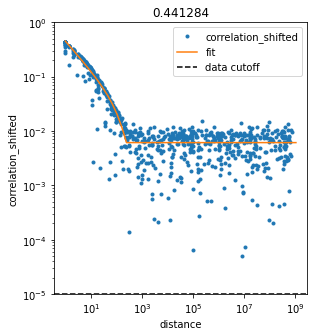


# beta: 0.441184
m0: 0.5165879957494729
y_min: 1e-05
number of data points: 713
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)



/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: divide by zero encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [4.63871382e-01 1.93993394e+02 2.63474498e-01 5.77795737e-03]
fitted equation: 4.64e-01e^(-x/ζ)/x^(2 Δ),ζ=1.94e+02,Δ=0.2635


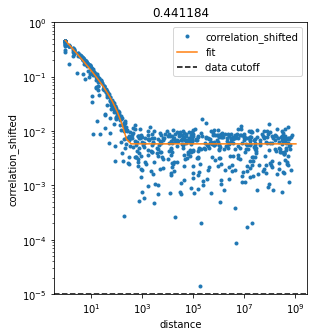


# beta: 0.441084
m0: 0.5013742033363172
y_min: 1e-05
number of data points: 716
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)



/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: divide by zero encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [4.73601617e-01 1.95376471e+02 2.47575120e-01 5.85706685e-03]
fitted equation: 4.74e-01e^(-x/ζ)/x^(2 Δ),ζ=1.95e+02,Δ=0.2476


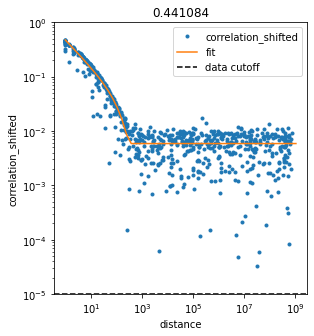


# beta: 0.440984
m0: 0.4830023311445643
y_min: 1e-05
number of data points: 713
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)



/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: divide by zero encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [4.91046405e-01 2.32991385e+02 2.37704363e-01 5.64239435e-03]
fitted equation: 4.91e-01e^(-x/ζ)/x^(2 Δ),ζ=2.33e+02,Δ=0.2377


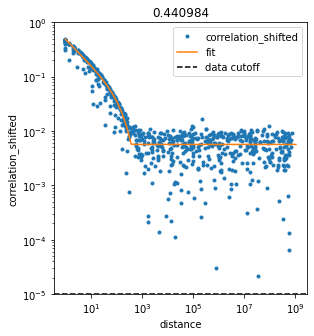


# beta: 0.440884
m0: 0.4590510238163945
y_min: 1e-05
number of data points: 722
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)



/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: divide by zero encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [5.17298629e-01 3.23759261e+02 2.30213881e-01 5.22272195e-03]
fitted equation: 5.17e-01e^(-x/ζ)/x^(2 Δ),ζ=3.24e+02,Δ=0.2302


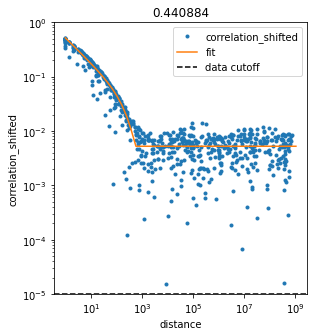


# beta: 0.440784
m0: 0.420293858062799
y_min: 1e-05
number of data points: 734
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)



/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: divide by zero encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [5.58047178e-01 6.16924102e+02 2.18870158e-01 4.65327847e-03]
fitted equation: 5.58e-01e^(-x/ζ)/x^(2 Δ),ζ=6.17e+02,Δ=0.2189


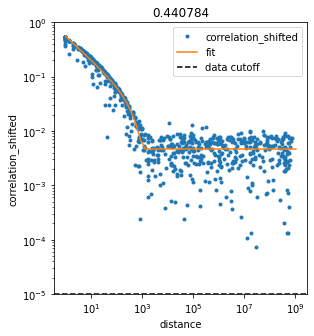


# beta: 0.440774
m0: 0.4138911852945449
y_min: 1e-05
number of data points: 734
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)



/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: divide by zero encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [5.63973608e-01 6.90352012e+02 2.16591028e-01 4.63064273e-03]
fitted equation: 5.64e-01e^(-x/ζ)/x^(2 Δ),ζ=6.90e+02,Δ=0.2166


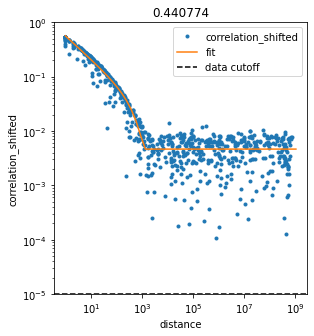


# beta: 0.440764
m0: 0.4076513014400394
y_min: 1e-05
number of data points: 728
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)



/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: divide by zero encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [5.68482751e-01 7.29346864e+02 2.13486530e-01 4.62929897e-03]
fitted equation: 5.68e-01e^(-x/ζ)/x^(2 Δ),ζ=7.29e+02,Δ=0.2135


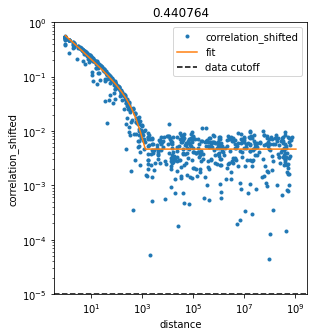


# beta: 0.440754
m0: 0.4019030934220214
y_min: 1e-05
number of data points: 742
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)



/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: divide by zero encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [5.74270519e-01 7.72350961e+02 2.11773823e-01 4.32078829e-03]
fitted equation: 5.74e-01e^(-x/ζ)/x^(2 Δ),ζ=7.72e+02,Δ=0.2118


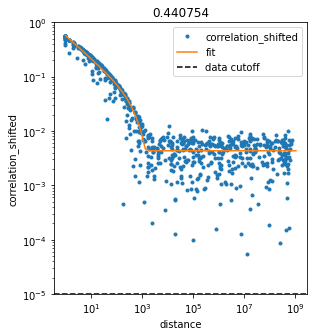


# beta: 0.440744
m0: 0.3944497206445084
y_min: 1e-05
number of data points: 746
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)



/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: divide by zero encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [5.77600941e-01 8.03067311e+02 2.07168679e-01 4.21081505e-03]
fitted equation: 5.78e-01e^(-x/ζ)/x^(2 Δ),ζ=8.03e+02,Δ=0.2072


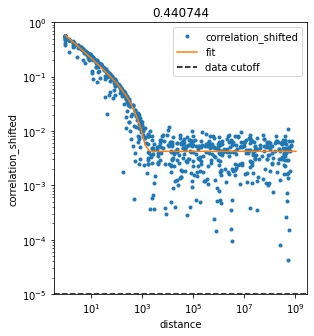


# beta: 0.440734
m0: 0.3848431522087082
y_min: 1e-05
number of data points: 748
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)



/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: divide by zero encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [5.87513372e-01 9.65936035e+02 2.04949778e-01 4.08895758e-03]
fitted equation: 5.88e-01e^(-x/ζ)/x^(2 Δ),ζ=9.66e+02,Δ=0.2049


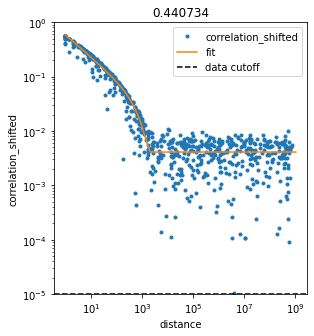


# beta: 0.440724
m0: 0.3732600293153758
y_min: 1e-05
number of data points: 756
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [5.94204795e-01 1.10761849e+03 1.99544830e-01 4.06535603e-03]
fitted equation: 5.94e-01e^(-x/ζ)/x^(2 Δ),ζ=1.11e+03,Δ=0.1995


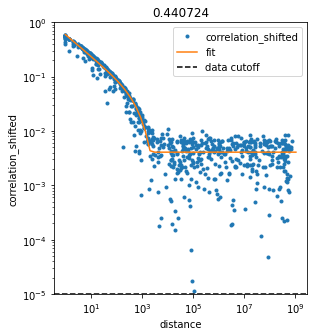


# beta: 0.440714
m0: 0.3612196232021397
y_min: 1e-05
number of data points: 757
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [6.06497125e-01 1.35848595e+03 1.97110870e-01 3.68684936e-03]
fitted equation: 6.06e-01e^(-x/ζ)/x^(2 Δ),ζ=1.36e+03,Δ=0.1971


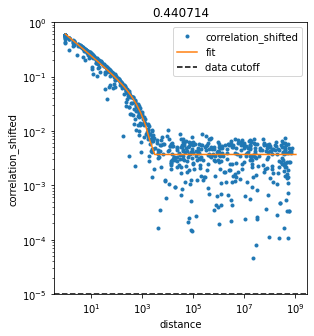


# beta: 0.440704
m0: 0.3418511333986988
y_min: 1e-05
number of data points: 760
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [6.16570969e-01 1.74631770e+03 1.89005589e-01 3.65864730e-03]
fitted equation: 6.17e-01e^(-x/ζ)/x^(2 Δ),ζ=1.75e+03,Δ=0.1890


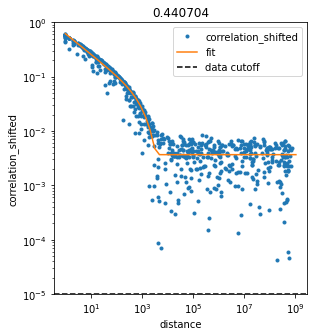


# beta: 0.440694
m0: 0.3132449123964154
y_min: 1e-05
number of data points: 767
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)



/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: divide by zero encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [6.35950452e-01 2.77315727e+03 1.80710681e-01 3.33199400e-03]
fitted equation: 6.36e-01e^(-x/ζ)/x^(2 Δ),ζ=2.77e+03,Δ=0.1807


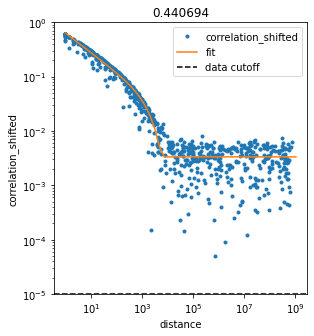


# beta: 0.440693
m0: 0.3098025512168798
y_min: 1e-05
number of data points: 770
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [6.36916753e-01 2.86142314e+03 1.79273068e-01 3.16251685e-03]
fitted equation: 6.37e-01e^(-x/ζ)/x^(2 Δ),ζ=2.86e+03,Δ=0.1793


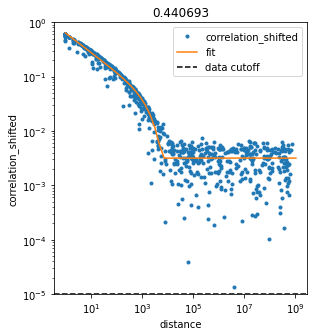


# beta: 0.440692
m0: 0.3057768975792358
y_min: 1e-05
number of data points: 768
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [6.40814931e-01 3.11016651e+03 1.78737730e-01 3.09376271e-03]
fitted equation: 6.41e-01e^(-x/ζ)/x^(2 Δ),ζ=3.11e+03,Δ=0.1787


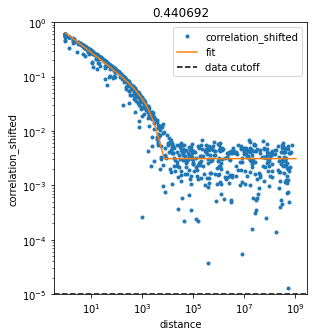


# beta: 0.440691
m0: 0.3007438167985488
y_min: 1e-05
number of data points: 769
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [6.39320707e-01 3.15350678e+03 1.75602742e-01 3.06907775e-03]
fitted equation: 6.39e-01e^(-x/ζ)/x^(2 Δ),ζ=3.15e+03,Δ=0.1756


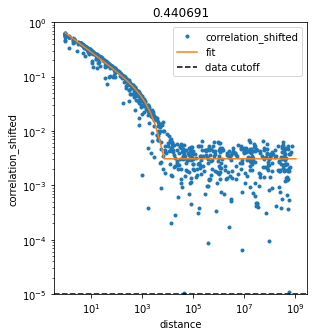


# beta: 0.44069
m0: 0.2945708071765457
y_min: 1e-05
number of data points: 773
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [6.46961240e-01 3.79379658e+03 1.75564944e-01 2.95748141e-03]
fitted equation: 6.47e-01e^(-x/ζ)/x^(2 Δ),ζ=3.79e+03,Δ=0.1756


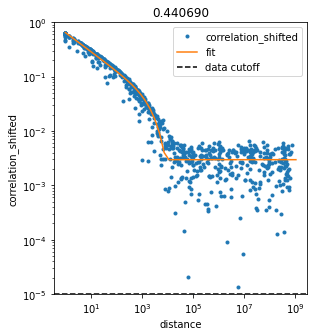


# beta: 0.440689
m0: 0.2873395985599556
y_min: 1e-05
number of data points: 776
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [6.50884041e-01 4.33536738e+03 1.73628177e-01 3.03388897e-03]
fitted equation: 6.51e-01e^(-x/ζ)/x^(2 Δ),ζ=4.34e+03,Δ=0.1736


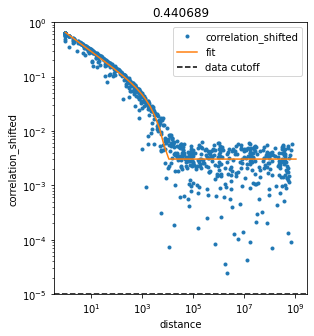


# beta: 0.440688
m0: 0.2806463072278355
y_min: 1e-05
number of data points: 781
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [6.53134391e-01 4.70202140e+03 1.71379480e-01 2.87403474e-03]
fitted equation: 6.53e-01e^(-x/ζ)/x^(2 Δ),ζ=4.70e+03,Δ=0.1714


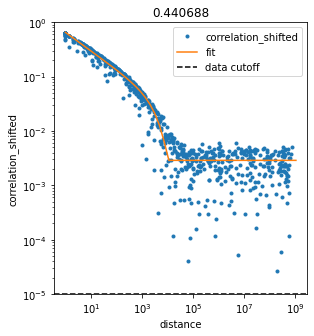


# beta: 0.440687
m0: 0.2707767983360145
y_min: 1e-05
number of data points: 777
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [6.86062556e-01 1.00806104e+04 1.78800878e-01 2.62049979e-03]
fitted equation: 6.86e-01e^(-x/ζ)/x^(2 Δ),ζ=1.01e+04,Δ=0.1788


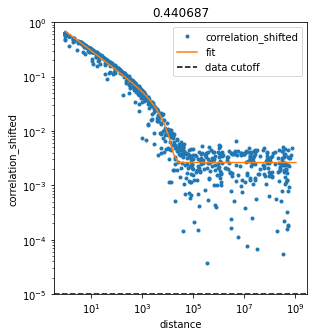


# beta: 0.440686
m0: 0.2581689157150425
y_min: 1e-05
number of data points: 784
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [7.02857525e-01 1.75994777e+04 1.79043151e-01 2.42596277e-03]
fitted equation: 7.03e-01e^(-x/ζ)/x^(2 Δ),ζ=1.76e+04,Δ=0.1790


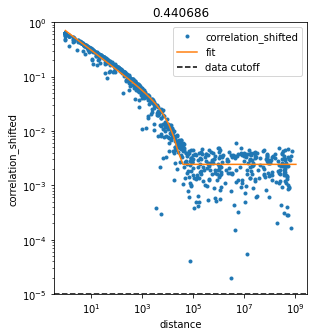


# beta: 0.440685
m0: 0.2383617657318912
y_min: 1e-05
number of data points: 798
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [7.16810212e-01 3.24167242e+04 1.75038948e-01 2.11771889e-03]
fitted equation: 7.17e-01e^(-x/ζ)/x^(2 Δ),ζ=3.24e+04,Δ=0.1750


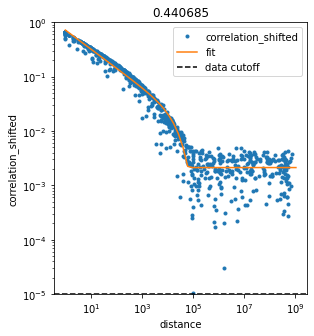


# beta: 0.440684
m0: 0.1878725947496341
y_min: 1e-05
number of data points: 833
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [7.31142213e-01 1.29784643e+05 1.61482973e-01 1.53252274e-03]
fitted equation: 7.31e-01e^(-x/ζ)/x^(2 Δ),ζ=1.30e+05,Δ=0.1615


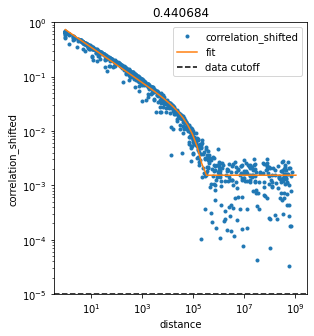


# beta: 0.440683
m0: 4.1319137205801837e-08
y_min: 1e-05
number of data points: 659
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)



/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: invalid value encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [ 7.14329072e-01  2.54134019e+05  1.33513536e-01 -8.69643466e-14]
fitted equation: 7.14e-01e^(-x/ζ)/x^(2 Δ),ζ=2.54e+05,Δ=0.1335


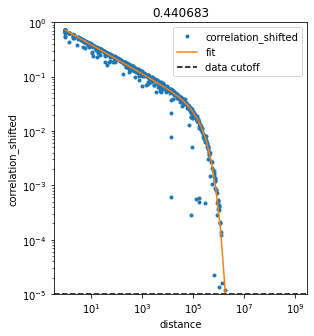


# beta: 0.440682
m0: 3.9430579260525417e-08
y_min: 1e-05
number of data points: 625
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [7.20334470e-01 1.16521217e+05 1.35204002e-01 9.37547663e-13]
fitted equation: 7.20e-01e^(-x/ζ)/x^(2 Δ),ζ=1.17e+05,Δ=0.1352


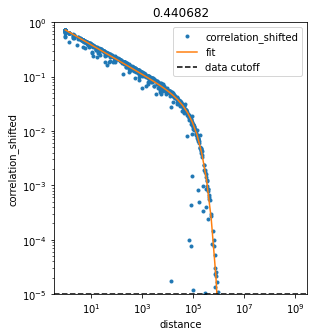


# beta: 0.440681
m0: 1.3773783751689832e-08
y_min: 1e-05
number of data points: 600
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)



/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: invalid value encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [7.18477725e-01 7.33822274e+04 1.35240267e-01 7.56709284e-17]
fitted equation: 7.18e-01e^(-x/ζ)/x^(2 Δ),ζ=7.34e+04,Δ=0.1352


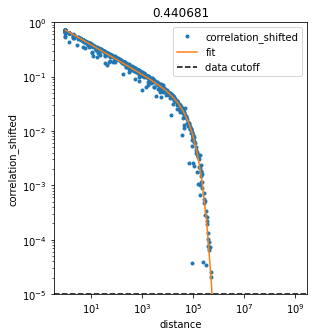


# beta: 0.44068
m0: 1.4672058772212609e-08
y_min: 1e-05
number of data points: 587
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)



/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: invalid value encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [ 7.21582829e-01  5.56700522e+04  1.36186617e-01 -1.72069528e-17]
fitted equation: 7.22e-01e^(-x/ζ)/x^(2 Δ),ζ=5.57e+04,Δ=0.1362


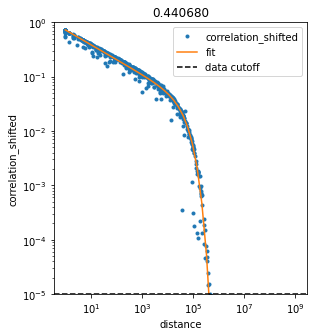


# beta: 0.440679
m0: 2.5909932219924647e-08
y_min: 1e-05
number of data points: 569
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [7.22720742e-01 4.43118547e+04 1.36704304e-01 1.21244764e-14]
fitted equation: 7.23e-01e^(-x/ζ)/x^(2 Δ),ζ=4.43e+04,Δ=0.1367


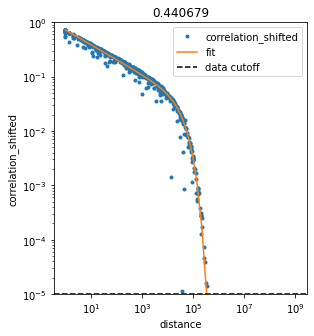


# beta: 0.440678
m0: 8.089543826777165e-09
y_min: 1e-05
number of data points: 564
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [ 7.17899388e-01  3.54817337e+04  1.35919611e-01 -7.20600291e-17]
fitted equation: 7.18e-01e^(-x/ζ)/x^(2 Δ),ζ=3.55e+04,Δ=0.1359


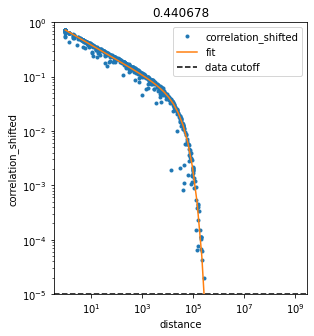


# beta: 0.440677
m0: 9.128560934359576e-09
y_min: 1e-05
number of data points: 560
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)



/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: invalid value encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [ 7.19294596e-01  3.06072086e+04  1.36417024e-01 -4.47206122e-16]
fitted equation: 7.19e-01e^(-x/ζ)/x^(2 Δ),ζ=3.06e+04,Δ=0.1364


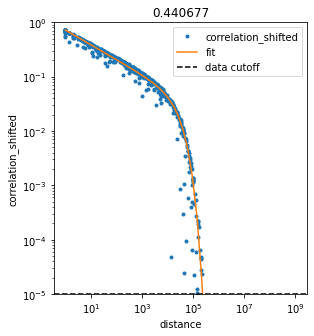


# beta: 0.440676
m0: 5.621924589088796e-09
y_min: 1e-05
number of data points: 552
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [ 7.20654999e-01  2.69906174e+04  1.36894646e-01 -1.89039209e-17]
fitted equation: 7.21e-01e^(-x/ζ)/x^(2 Δ),ζ=2.70e+04,Δ=0.1369


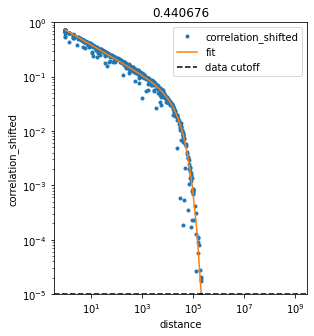


# beta: 0.440675
m0: 6.715113721868153e-11
y_min: 1e-05
number of data points: 545
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)



/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: invalid value encountered in log
  return np.log(foo(np.exp(logX),*p))


fitted parameters: [ 7.15024906e-01  2.31213365e+04  1.35792987e-01 -2.55400785e-21]
fitted equation: 7.15e-01e^(-x/ζ)/x^(2 Δ),ζ=2.31e+04,Δ=0.1358


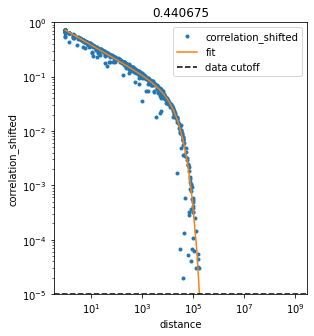


# beta: 0.440674
m0: 5.592575131494181e-09
y_min: 1e-05
number of data points: 535
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [ 7.16369807e-01  2.10201200e+04  1.36277402e-01 -2.99958990e-17]
fitted equation: 7.16e-01e^(-x/ζ)/x^(2 Δ),ζ=2.10e+04,Δ=0.1363


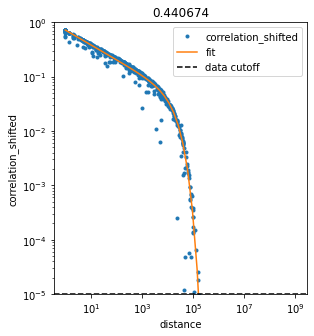


# beta: 0.440664
m0: 1.8045882485864202e-09
y_min: 1e-05
number of data points: 501
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [ 7.22574906e-01  1.07308163e+04  1.38824107e-01 -2.85949373e-18]
fitted equation: 7.23e-01e^(-x/ζ)/x^(2 Δ),ζ=1.07e+04,Δ=0.1388


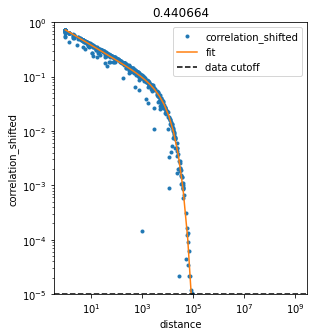


# beta: 0.440654
m0: 2.0934661625504188e-09
y_min: 1e-05
number of data points: 481
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [ 7.19323765e-01  7.10208218e+03  1.38862078e-01 -6.75021259e-19]
fitted equation: 7.19e-01e^(-x/ζ)/x^(2 Δ),ζ=7.10e+03,Δ=0.1389


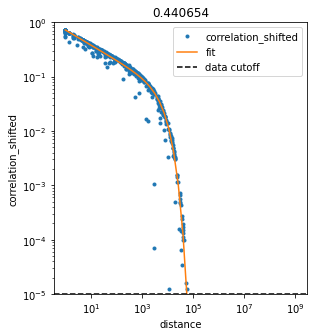


# beta: 0.440644
m0: 1.2303804100082415e-10
y_min: 1e-05
number of data points: 464
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [ 7.19355398e-01  5.33719165e+03  1.39525748e-01 -1.68883825e-21]
fitted equation: 7.19e-01e^(-x/ζ)/x^(2 Δ),ζ=5.34e+03,Δ=0.1395


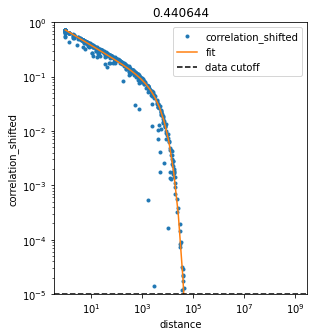


# beta: 0.440634
m0: 2.505015484939534e-10
y_min: 1e-05
number of data points: 452
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [ 7.17863456e-01  4.19435070e+03  1.39608132e-01 -1.87847141e-21]
fitted equation: 7.18e-01e^(-x/ζ)/x^(2 Δ),ζ=4.19e+03,Δ=0.1396


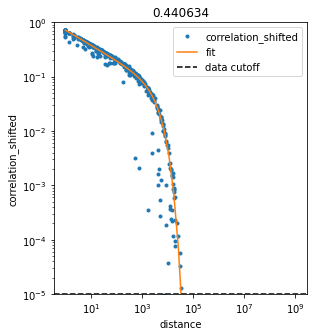


# beta: 0.440624
m0: 4.6408032054637796e-10
y_min: 1e-05
number of data points: 438
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [7.23259784e-01 3.65779650e+03 1.41669484e-01 6.17537414e-21]
fitted equation: 7.23e-01e^(-x/ζ)/x^(2 Δ),ζ=3.66e+03,Δ=0.1417


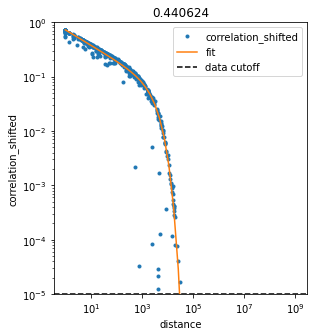


# beta: 0.440614
m0: 1.3114321510663718e-10
y_min: 1e-05
number of data points: 431
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [7.19218802e-01 3.07904379e+03 1.40905637e-01 5.45406932e-22]
fitted equation: 7.19e-01e^(-x/ζ)/x^(2 Δ),ζ=3.08e+03,Δ=0.1409


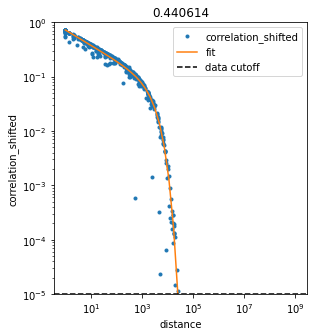


# beta: 0.440604
m0: 7.754759934102207e-11
y_min: 1e-05
number of data points: 420
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [ 7.16634578e-01  2.66585790e+03  1.40545765e-01 -6.32690827e-23]
fitted equation: 7.17e-01e^(-x/ζ)/x^(2 Δ),ζ=2.67e+03,Δ=0.1405


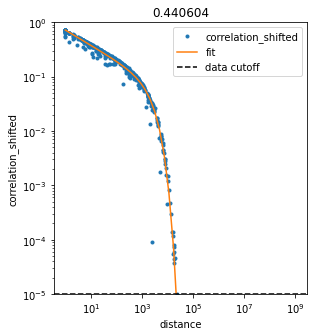


# beta: 0.440594
m0: 4.5829133871018266e-11
y_min: 1e-05
number of data points: 419
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [7.12630879e-01 2.30261453e+03 1.39626633e-01 8.92986967e-23]
fitted equation: 7.13e-01e^(-x/ζ)/x^(2 Δ),ζ=2.30e+03,Δ=0.1396


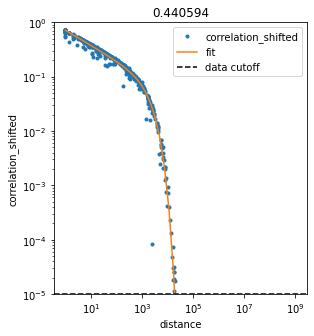


# beta: 0.440574
m0: 1.0332473024940059e-10
y_min: 1e-05
number of data points: 407
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [7.12154011e-01 1.89732767e+03 1.40083928e-01 8.80146249e-22]
fitted equation: 7.12e-01e^(-x/ζ)/x^(2 Δ),ζ=1.90e+03,Δ=0.1401


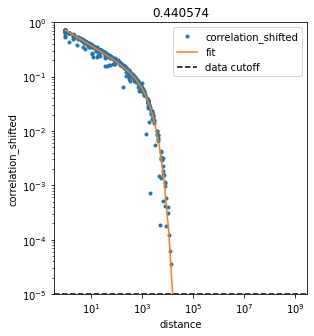


# beta: 0.440474
m0: 4.549912402812423e-11
y_min: 1e-05
number of data points: 385
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [7.16583598e-01 1.02661485e+03 1.44039764e-01 2.32083695e-22]
fitted equation: 7.17e-01e^(-x/ζ)/x^(2 Δ),ζ=1.03e+03,Δ=0.1440


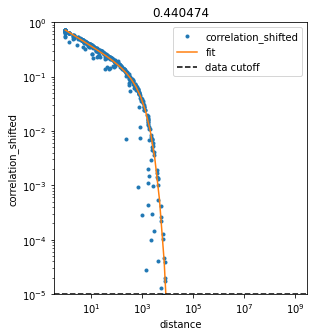


# beta: 0.440374
m0: 6.24763279235135e-13
y_min: 1e-05
number of data points: 366
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [7.13119306e-01 6.91124194e+02 1.44753085e-01 4.99899740e-26]
fitted equation: 7.13e-01e^(-x/ζ)/x^(2 Δ),ζ=6.91e+02,Δ=0.1448


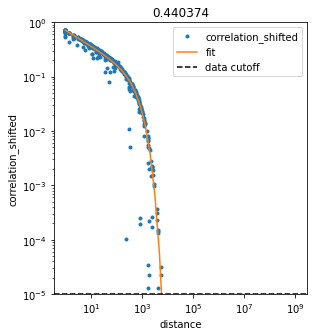


# beta: 0.440274
m0: 4.343672958568603e-12
y_min: 1e-05
number of data points: 357
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [7.09706283e-01 5.20631662e+02 1.45078238e-01 2.00286509e-24]
fitted equation: 7.10e-01e^(-x/ζ)/x^(2 Δ),ζ=5.21e+02,Δ=0.1451


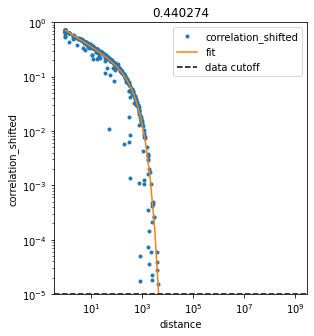


# beta: 0.440174
m0: 1.1742424194724484e-11
y_min: 1e-05
number of data points: 343
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [7.09584739e-01 4.26725568e+02 1.46533065e-01 1.60422381e-23]
fitted equation: 7.10e-01e^(-x/ζ)/x^(2 Δ),ζ=4.27e+02,Δ=0.1465


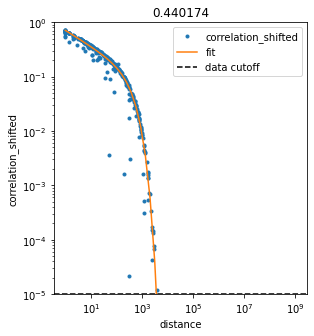


# beta: 0.440074
m0: 4.859659604401172e-12
y_min: 1e-05
number of data points: 332
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [6.99528584e-01 3.43609450e+02 1.43355812e-01 3.07223426e-24]
fitted equation: 7.00e-01e^(-x/ζ)/x^(2 Δ),ζ=3.44e+02,Δ=0.1434


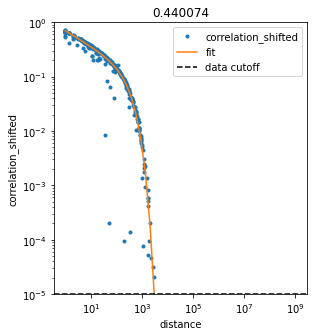


# beta: 0.439974
m0: 4.709046389789855e-12
y_min: 1e-05
number of data points: 330
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [6.87804670e-01 2.78741962e+02 1.38843000e-01 3.31641782e-24]
fitted equation: 6.88e-01e^(-x/ζ)/x^(2 Δ),ζ=2.79e+02,Δ=0.1388


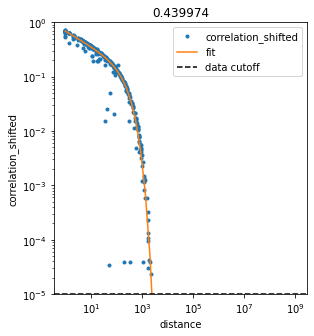


# beta: 0.439874
m0: 3.5594867409299997e-12
y_min: 1e-05
number of data points: 320
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [6.96520356e-01 2.57433354e+02 1.43946607e-01 1.86000369e-24]
fitted equation: 6.97e-01e^(-x/ζ)/x^(2 Δ),ζ=2.57e+02,Δ=0.1439


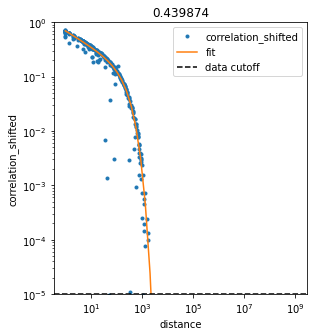


# beta: 0.439774
m0: 1.5839135572802596e-12
y_min: 1e-05
number of data points: 317
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)

fitted parameters: [6.99680901e-01 2.34950195e+02 1.46491657e-01 3.46424815e-25]
fitted equation: 7.00e-01e^(-x/ζ)/x^(2 Δ),ζ=2.35e+02,Δ=0.1465


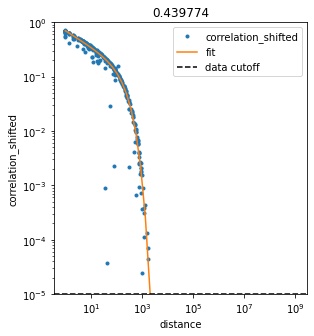

file saved to ./data/hotrg_gilt_X24_betas/fit_results.csv


In [2]:
def high_temp_correlation_with_noice(x,A,zeta,delta,noise_level): #high temperature
    return np.maximum(A*np.exp(-x/zeta)*x**(-2*delta),noise_level)
high_temp_correlation_with_noice.eq='{0:.2e}e^(-x/ζ)/x^(2 Δ),ζ={1:.2e},Δ={2:.4f}'
high_temp_correlation_with_noice.p0=(1,100,0.1,0.01)


names=sorted([os.path.basename(x)[0:-4] for x in glob('./data/hotrg_gilt_X24_betas/*.pth')])
names=names[::-1]
betas=[float(x) for x in names]

data=[]
for beta,name in list(zip(betas,names)):
    print("\n# beta:",beta)
    if not os.path.exists('./data/hotrg_gilt_X24_betas/'+name+'_observables.csv')\
        or not os.path.exists('./data/hotrg_gilt_X24_betas/'+name+'_correlation.pkl'):
        continue

    data_obs=pd.read_csv('./data/hotrg_gilt_X24_betas/'+name+'_observables.csv')
    m0=data_obs['magnetization'].iloc[-1]

    data_corr=pd.read_pickle('./data/hotrg_gilt_X24_betas/'+name+'_correlation.pkl')
    if os.path.exists('./data/hotrg_gilt_X24_betas/'+name+'_correlation_appended.pkl'):
        data_corr=pd.concat([data_corr,pd.read_pickle('./data/hotrg_gilt_X24_betas/'+name+'_correlation_appended.pkl')])
    data_corr=process_data(data_corr)

    data_corr['correlation_shifted']=data_corr['correlation']-m0**2

    high_temp_correlation_with_noice.p0=(5e-1,1e3,.2,.1*m0**2)
    y_min=1e-5
    x_max=np.inf
    print('m0:',m0)
    print('y_min:',y_min)
    p,ansatz=fit_data(data_corr['dist'],data_corr['correlation_shifted'],high_temp_correlation_with_noice,
                        y_min=y_min,x_max=x_max)
    
    # zeta=p[1]
    # x_max_UV=zeta/3
    # p_UV,ansatz_UV=fit_data(data_corr['dist'],data_corr['correlation'],critical_correlation,
    #                     y_min=y_min,use_loglog=True,x_max=x_max_UV)

    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.plot(data_corr['dist'],data_corr['correlation_shifted'],'.',label='correlation_shifted')
    r=np.geomspace(1,2**30)
    plt.plot(r,ansatz(r,*p),'-',label='fit')
    plt.axhline(y_min,color='k',ls='--',label='data cutoff')
    plt.axvline(x_max,color='k',ls='--')
    plt.yscale('log');plt.xscale('log');plt.ylim(1e-5,1e0)
    plt.title(name);plt.xlabel('distance');plt.ylabel('correlation_shifted')
    plt.legend()

    # plt.subplot(122)
    # plt.plot(data_corr['dist'],np.abs(data_corr['correlation']),'.',label='correlation')
    # r=np.geomspace(1,x_max_UV)
    # plt.plot(r,np.abs(ansatz_UV(r,*p_UV)),'-',label='fit')
    # plt.axhline(y_min,color='k',ls='--',label='data cutoff')
    # plt.axvline(x_max_UV,color='k',ls='--')
    # plt.yscale('log');plt.xscale('log');plt.ylim(1e-5,1e0)
    # plt.title(name);plt.xlabel('distance');plt.ylabel('correlation')
    # plt.legend()
    plt.show()

    data.append({
        'beta':beta,
        'm0':m0,
        'A':p[0],
        'zeta':p[1],
        'delta':p[2],
        # 'A_UV':p_UV[0],
        # 'delta_UV':p_UV[1],
    })
data=pd.DataFrame(data)
    
data.to_csv('./data/hotrg_gilt_X24_betas/fit_results.csv',index=False)
print('file saved to ./data/hotrg_gilt_X24_betas/fit_results.csv')

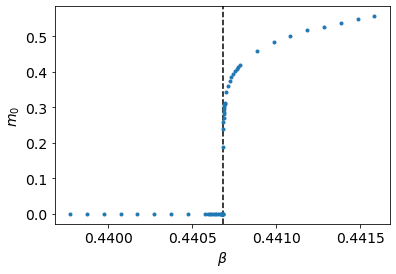


# High temperature
number of data points: 27
def critical_exponent(tau,A,k): #critical temperature
    return A*tau**k

fitted parameters: [ 1.79292167e-16 -1.56258371e+00]
fitted equation: A τ^k,A=1.79e-16,k=-1.5626

# Low temperature
number of data points: 28
def critical_exponent(tau,A,k): #critical temperature
    return A*tau**k

fitted parameters: [1.22351736 0.12742172]
fitted equation: A τ^k,A=1.22e+00,k=0.1274


/home/wenhan/jupyter/TRGCFT/correlation_ansatzs.py:10: RuntimeWarning: invalid value encountered in log
  return np.log(foo(np.exp(logX),*p))


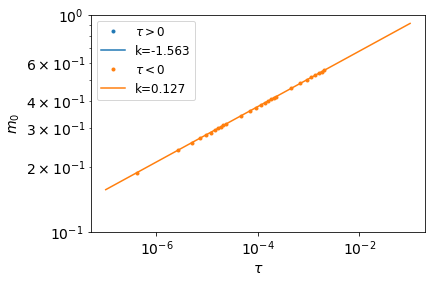

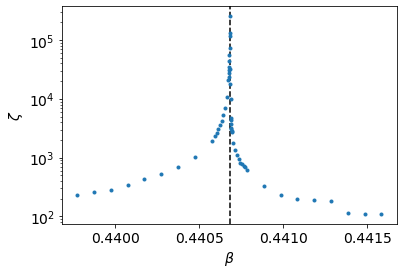


# High temperature
number of data points: 27
def critical_exponent(tau,A,k): #critical temperature
    return A*tau**k

fitted parameters: [ 0.48388548 -0.99866486]
fitted equation: A τ^k,A=4.84e-01,k=-0.9987

# Low temperature
number of data points: 28
def critical_exponent(tau,A,k): #critical temperature
    return A*tau**k

fitted parameters: [ 1.08266611 -0.74413456]
fitted equation: A τ^k,A=1.08e+00,k=-0.7441


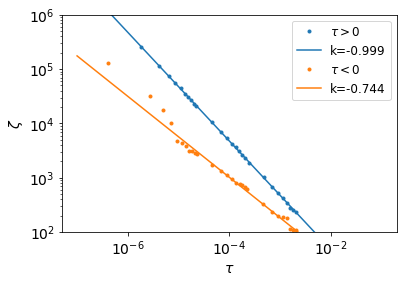

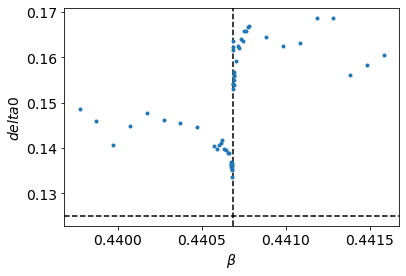


# High temperature
number of data points: 27
def critical_exponent(tau,A,k): #critical temperature
    return A*tau**k

fitted parameters: [0.05094682 0.13412209]
fitted equation: A τ^k,A=5.09e-02,k=0.1341

# Low temperature
number of data points: 28
def critical_exponent(tau,A,k): #critical temperature
    return A*tau**k

fitted parameters: [0.05251723 0.04021977]
fitted equation: A τ^k,A=5.25e-02,k=0.0402


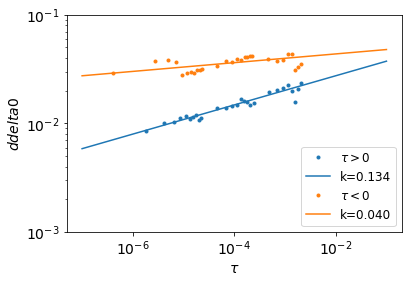

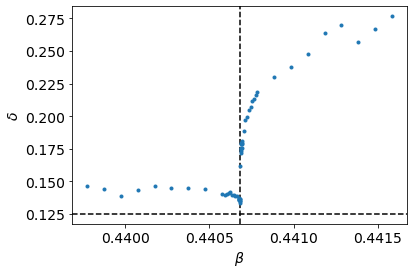


# High temperature
number of data points: 27
def critical_exponent(tau,A,k): #critical temperature
    return A*tau**k

fitted parameters: [0.04467181 0.12229555]
fitted equation: A τ^k,A=4.47e-02,k=0.1223

# Low temperature
number of data points: 28
def critical_exponent(tau,A,k): #critical temperature
    return A*tau**k

fitted parameters: [0.48243608 0.19646813]
fitted equation: A τ^k,A=4.82e-01,k=0.1965


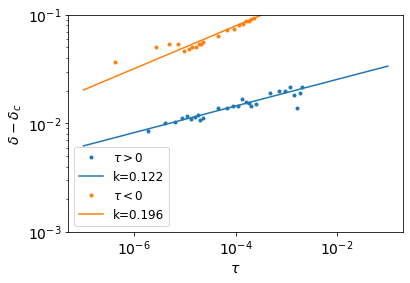

In [3]:
import importlib
importlib.reload(importlib.import_module('correlation_ansatzs'))
from correlation_ansatzs import critical_exponent,scale_dependent_delta,low_temp_correlation

data=pd.read_csv('./data/hotrg_gilt_X24_betas/fit_results.csv')
beta_critical=0.44068381958007813
delta_critical=0.125
data['tau']=(beta_critical-data['beta'])/beta_critical
data['ddelta']=data['delta']-delta_critical
data['corr1']=low_temp_correlation(x=1,A=data['A'],zeta=data['zeta'],delta=data['delta'],m0=data['m0'])
data['delta0']=scale_dependent_delta(x=1,A=data['A'],zeta=data['zeta'],delta=data['delta'],m0=data['m0'])
data['ddelta0']=data['delta0']-delta_critical

def latex(name):
    return {
    'beta':'\\beta',
    'tau':'\\tau',
    'm0':'m_0',
    'A':'A',
    'zeta':'\\zeta',
    'delta':'\\delta',
    'ddelta':'\\delta-\\delta_c',
    
    }.get(name,name)

def plot_data(data,xname,yname,yscale='linear',x_ref=None,y_ref=None):
    plt.rcParams.update({'font.size': 14,'legend.fontsize':12})
    plt.figure()
    if y_ref is not None:plt.axhline(y_ref,color='k',ls='--')
    if x_ref is not None:plt.axvline(x_ref,color='k',ls='--')
    plt.plot(data[xname],data[yname],'.',label='$'+latex(yname)+'$')
    plt.xlabel('$'+latex(xname)+'$');plt.ylabel('$'+latex(yname)+'$')
    plt.yscale(yscale)
    plt.show()



def plot_data_loglog(data,xname,yname,ylim=None):
    plt.rcParams.update({'font.size': 14,'legend.fontsize':12})
    plt.figure()
    x_fit=np.geomspace(1e-7,1e-1)

    print('\n# High temperature')
    mask=data[xname]>0
    x_abs,y_abs=np.abs(data[mask][xname]),np.abs(data[mask][yname])
    p,ansatz=fit_data(x_abs,y_abs,critical_exponent,use_loglog=True)
    plt.plot(x_abs,y_abs,'.',color='C0',label='$'+latex(xname)+'>0$')
    plt.plot(x_fit,ansatz(x_fit,*p),'-',color='C0',label='k={:.3f}'.format(p[1]))

    print('\n# Low temperature')
    mask=data[xname]<0
    x_abs,y_abs=np.abs(data[mask][xname]),np.abs(data[mask][yname])
    p,ansatz=fit_data(x_abs,y_abs,critical_exponent,use_loglog=True)
    plt.plot(x_abs,y_abs,'.',color='C1',label='$'+latex(xname)+'<0$')
    plt.plot(x_fit,ansatz(x_fit,*p),'-',color='C1',label='k={:.3f}'.format(p[1]))

    plt.xscale('log');plt.yscale('log')
    plt.xlabel('$'+latex(xname)+'$');plt.ylabel('$'+latex(yname)+'$')
    plt.ylim(ylim)
    plt.legend()
    plt.show()

# plot_data(data,'beta','A',x_ref=beta_critical)
# plot_data_loglog(data,'tau','A',ylim=(1e-1,1))
# plot_data(data,'beta','corr1',x_ref=beta_critical,y_ref=1)

plot_data(data,'beta','m0',x_ref=beta_critical)
plot_data_loglog(data,'tau','m0',ylim=(1e-1,1))

plot_data(data,'beta','zeta',yscale='log',x_ref=beta_critical)
plot_data_loglog(data,'tau','zeta',ylim=(1e2,1e6))

plot_data(data,'beta','delta0',x_ref=beta_critical,y_ref=delta_critical)
plot_data_loglog(data,'tau','ddelta0',ylim=(1e-3,.1))

plot_data(data,'beta','delta',x_ref=beta_critical,y_ref=delta_critical)
plot_data_loglog(data,'tau','ddelta',ylim=(1e-3,.1))


# display(data)

In [ ]:
display(data)